# M√≥dulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secund√°rio       Casado            Casa   
1           0   Empres√°rio         Secund√°rio       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empres√°rio         Secund√°rio       Casado            Casa   
4           0  Assalariado         Secund√°rio       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36       3.575342                    3.0  False  3369.24  
1     42       0.860274                    2.0  False  6096.14  
2     31       8.065753                    4.0  False  5658.98  
3     50       1.208219                    2.0  False  7246.69  
4     52      13.873973                    2.0  False  4017.37

1) Construa um gr√°fico de barras para avaliar a distribui√ß√£o das vari√°veis qualitativas no tempo. Voc√™ acha que houve alguma altera√ß√£o importante a ser investigada?

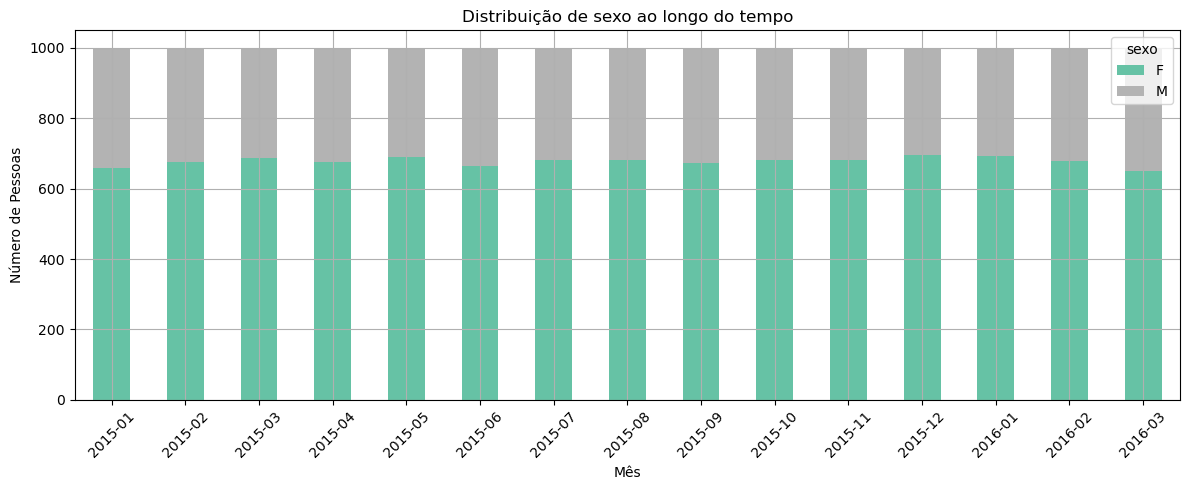

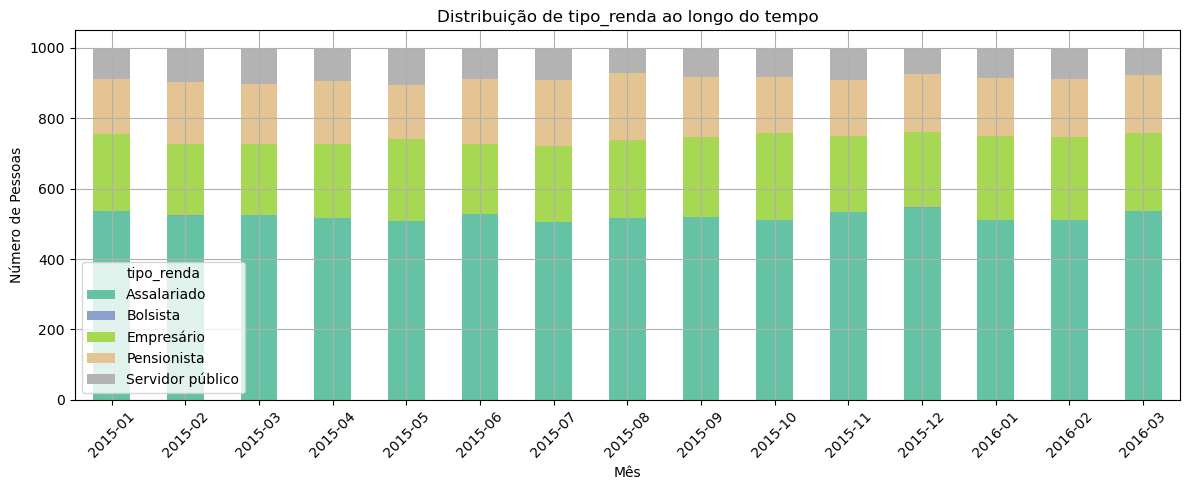

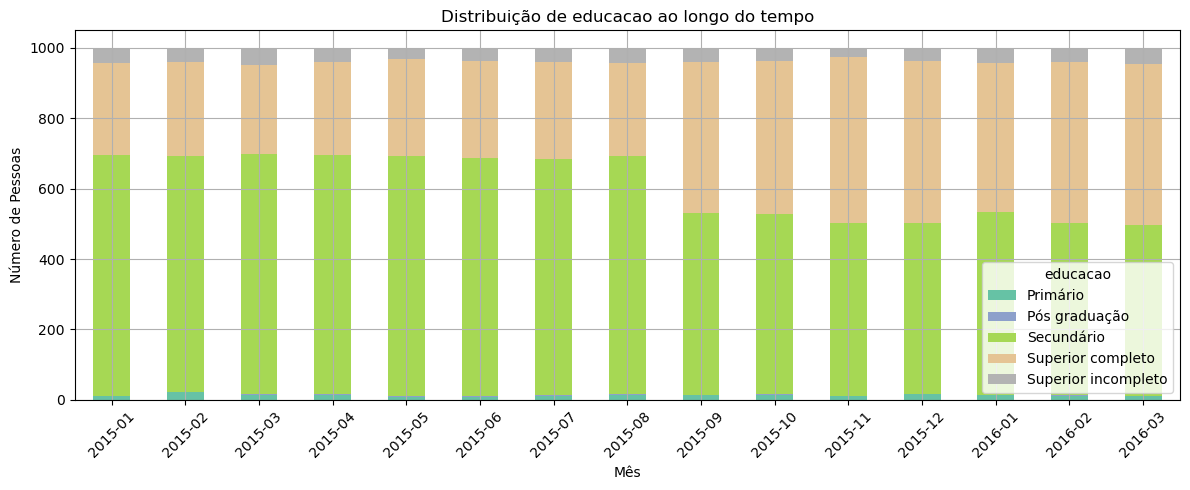

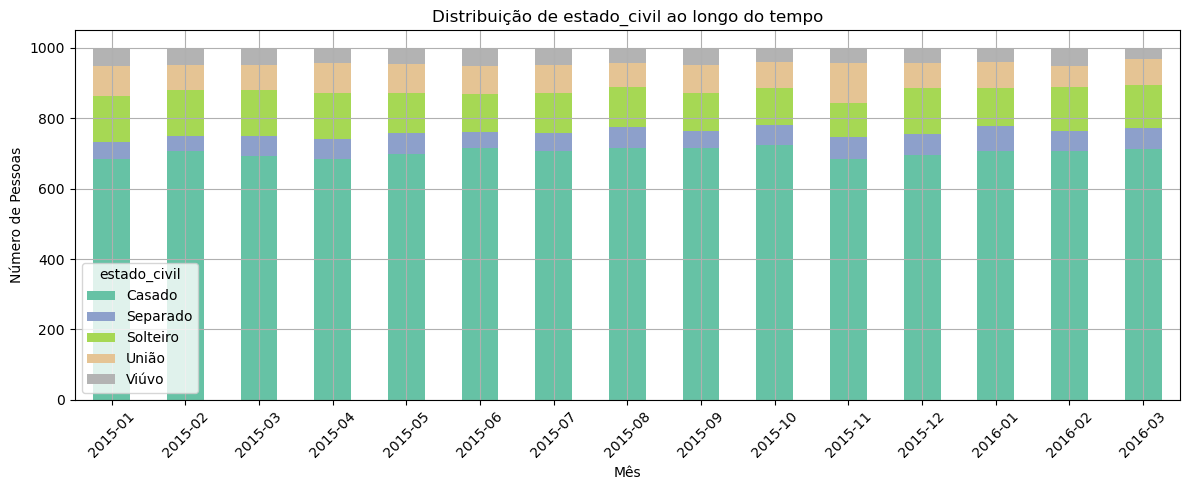

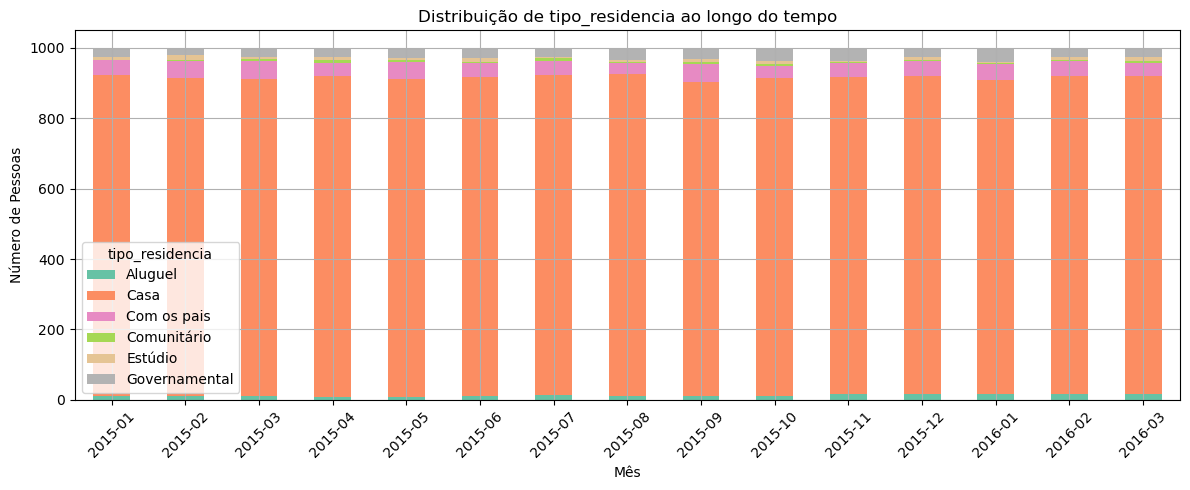

In [13]:
# Carregar os dados
df = pd.read_csv('previsao_de_renda.csv')
df['data_ref'] = pd.to_datetime(df['data_ref'])
df['mes'] = df['data_ref'].dt.to_period('M')

# Lista de vari√°veis qualitativas
variaveis_qualitativas = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Gerar gr√°fico de barras empilhadas para cada vari√°vel
for var in variaveis_qualitativas:
    agrupado = df.groupby(['mes', var]).size().unstack().fillna(0)
    agrupado.plot(kind='bar', stacked=True, figsize=(12, 5), colormap='Set2')
    plt.title(f'Distribui√ß√£o de {var} ao longo do tempo')
    plt.xlabel('M√™s')
    plt.ylabel('N√∫mero de Pessoas')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title=var)
    plt.show()

### üìå Conclus√µes ‚Äì Distribui√ß√£o das Vari√°veis Qualitativas no Tempo (Exerc√≠cio 1.1)

Abaixo est√£o as conclus√µes com base na an√°lise gr√°fica da distribui√ß√£o mensal de cada vari√°vel qualitativa:

---

#### 1. **Sexo**
- A distribui√ß√£o entre `Feminino` e `Masculino` permanece **est√°vel ao longo do tempo**, sem flutua√ß√µes relevantes.
- ‚úÖ **Conclus√£o**: Vari√°vel consistente e adequada para uso em modelagem preditiva.

---

#### 2. **Tipo de Renda**
- As categorias (`Assalariado`, `Empres√°rio`, `Servidor p√∫blico`, etc.) mant√™m **distribui√ß√µes regulares ao longo do tempo**.
- ‚úÖ **Conclus√£o**: Forte poder explicativo e √≥tima estabilidade. Deve ser utilizada na modelagem.

---

#### 3. **Educa√ß√£o**
- A propor√ß√£o entre n√≠veis educacionais √© **relativamente constante**, com pequenas oscila√ß√µes em categorias menos frequentes.
- ‚úÖ **Conclus√£o**: Vari√°vel est√°vel e informativa. Pode agregar valor ao modelo.

---

#### 4. **Estado Civil**
- Distribui√ß√£o bastante equilibrada, com `Casado` como categoria predominante.
- ‚úÖ **Conclus√£o**: Apresenta estabilidade e pode ser √∫til na modelagem.

---

#### 5. **Tipo de Resid√™ncia**
- Leves varia√ß√µes entre `Casa`, `Aluguel`, `Com os pais`, mas sem grandes mudan√ßas ao longo do tempo.
- ‚ö†Ô∏è **Conclus√£o**: Est√°vel, por√©m pode ter menor poder explicativo isoladamente. Recomendado uso em conjunto com outras vari√°veis.

---

De forma geral, todas as vari√°veis analisadas apresentam **boa estabilidade temporal**, o que refor√ßa sua **adequa√ß√£o para uso em modelos preditivos**, como regress√£o de renda.




2) Para cada vari√°vel qualitativa, construa um gr√°fico mostrando as m√©dias de cada n√≠vel da vari√°vel no tempo e avalie a estabilidade. Houve alguma altera√ß√£o importante? Voc√™ acha que se pode utilizar essas vari√°veis em uma modelagem?

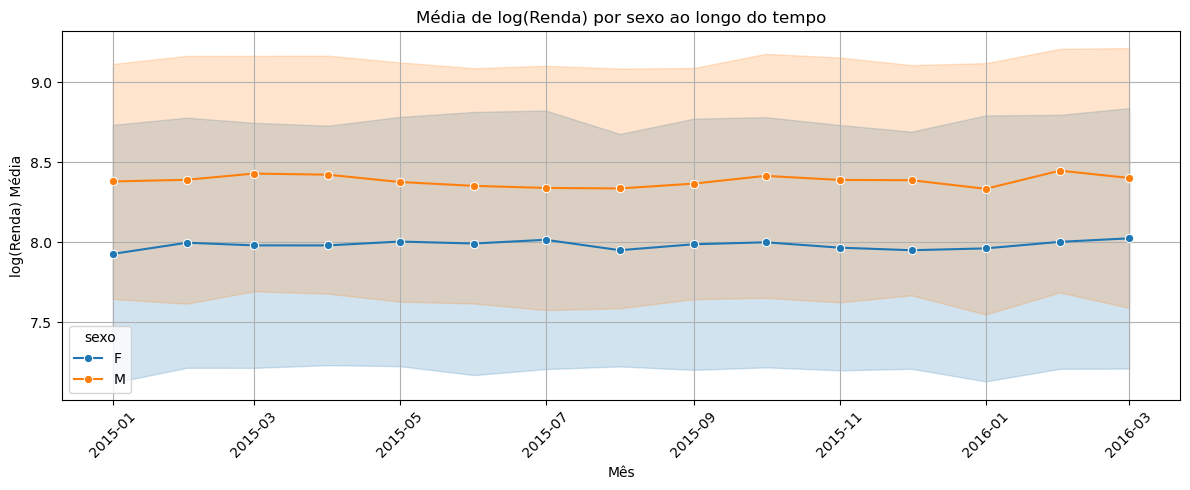

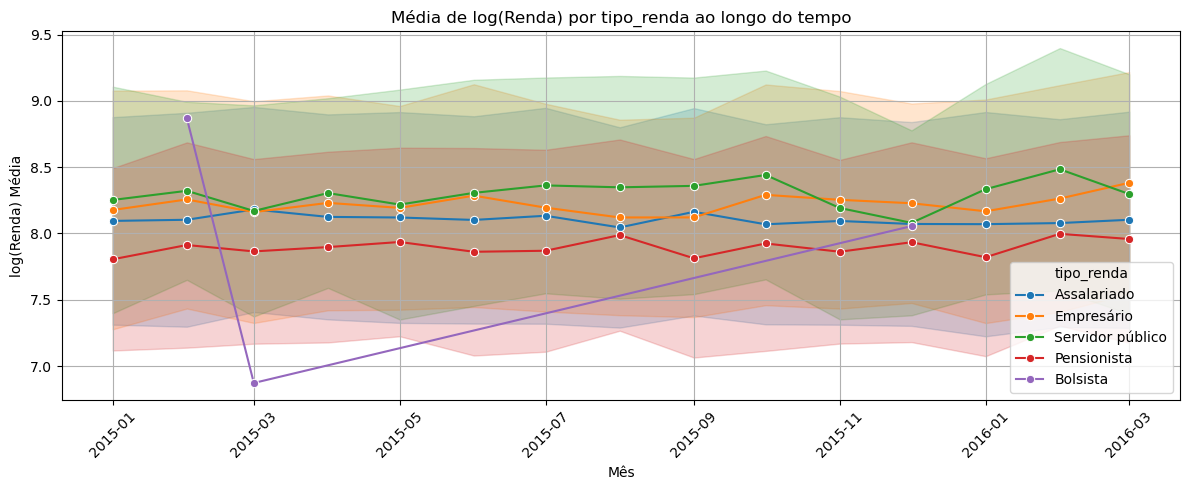

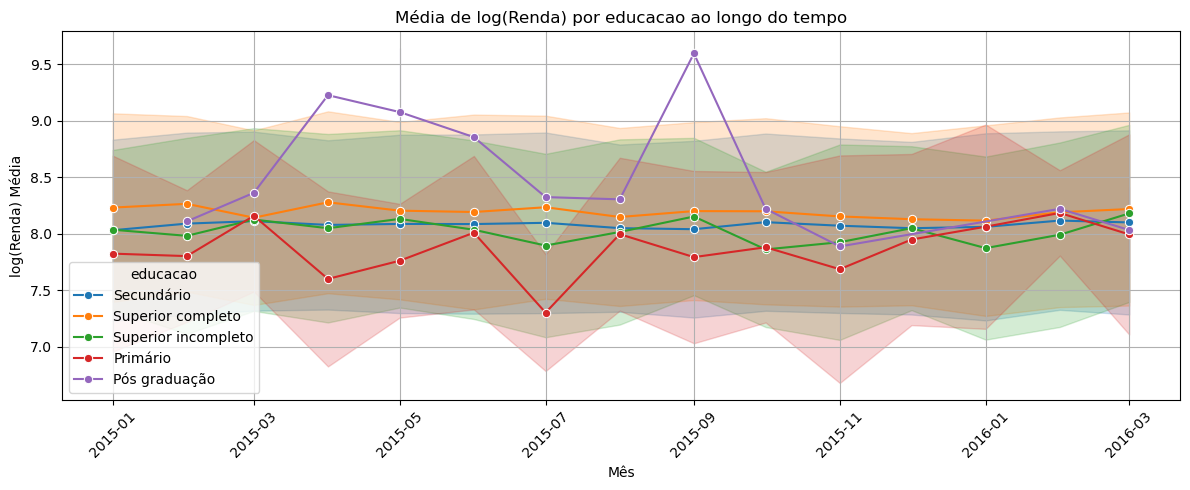

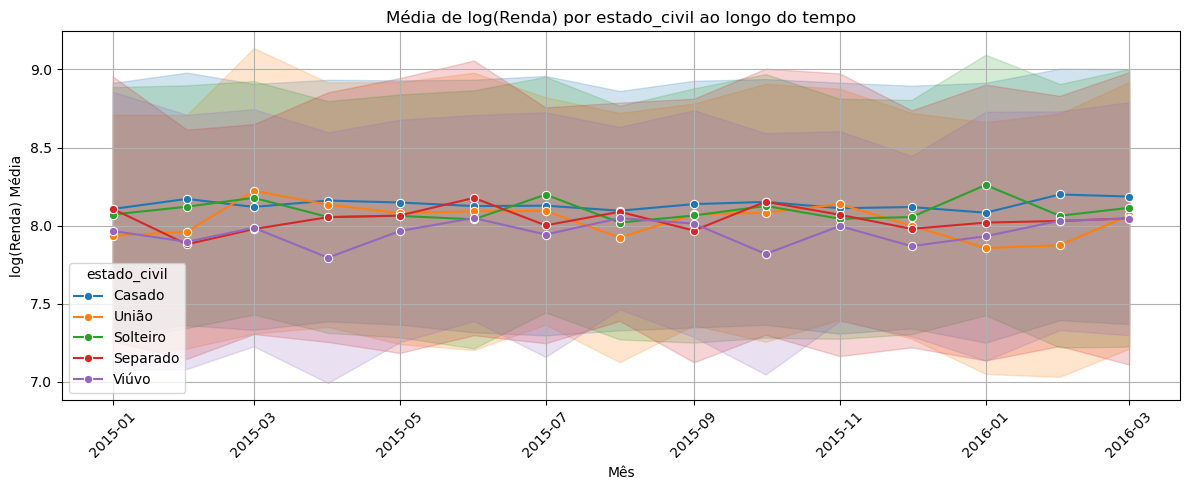

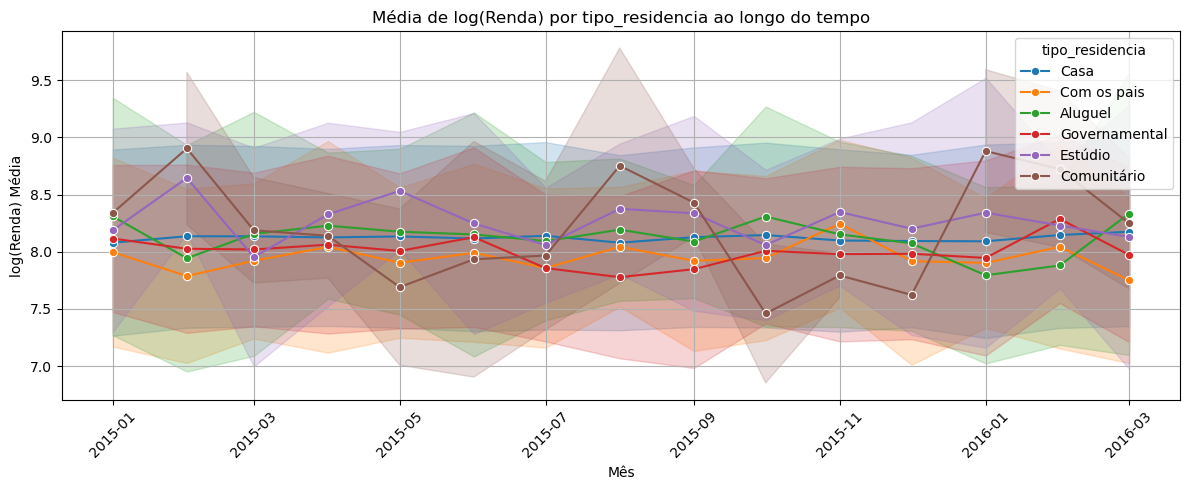

In [14]:

# Carregamento e pr√©-processamento
df = pd.read_csv('previsao_de_renda.csv')
df['data_ref'] = pd.to_datetime(df['data_ref'])
df['mes'] = df['data_ref'].dt.to_period('M')
df['mes_timestamp'] = df['mes'].dt.to_timestamp()
df['log_renda'] = np.log1p(df['renda'])

# Lista de vari√°veis qualitativas
variaveis_qualitativas = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Gr√°ficos de m√©dia do log_renda ao longo do tempo por categoria
for var in variaveis_qualitativas:
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='mes_timestamp', y='log_renda', hue=var, marker='o', errorbar='sd')
    plt.title(f'M√©dia de log(Renda) por {var} ao longo do tempo')
    plt.xlabel('M√™s')
    plt.ylabel('log(Renda) M√©dia')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title=var)
    plt.show()

# üìä An√°lise da Estabilidade das Vari√°veis Qualitativas no Tempo

## 1. Sexo
- As m√©dias de log(renda) para os grupos Feminino e Masculino s√£o relativamente constantes ao longo do tempo.
- H√° diferen√ßa clara entre os grupos, com homens apresentando renda m√©dia um pouco maior.

‚úÖ Utiliz√°vel na modelagem. Est√°vel e com capacidade discriminativa.

---

## 2. Tipo de Renda
- As categorias (ex: Assalariado, Empres√°rio, Servidor p√∫blico) apresentam diferen√ßas significativas de renda, especialmente empres√°rios e servidores p√∫blicos com maiores valores m√©dios.
- A estabilidade temporal √© boa, com pouca oscila√ß√£o.

‚úÖ Boa candidata para modelagem. Ajuda a explicar varia√ß√µes na renda.

---

## 3. Educa√ß√£o
- Quanto maior o n√≠vel de escolaridade, maior a renda m√©dia ‚Äî padr√£o esperado e est√°vel.
- Exemplo: Superior completo > Secund√°rio > Fundamental.

‚úÖ Altamente relevante para modelagem, ao haver um gradiente claro e consistente.

---

## 4. Estado Civil
- Diferen√ßas entre Casado, Solteiro, Separado, etc., s√£o relativamente pequenas.
- A estabilidade √© aceit√°vel, mas o poder discriminativo √© limitado.

‚ö†Ô∏è Pode ser usada, mas talvez n√£o agregue tanto valor ao modelo sozinho.

---

## 5. Tipo de Resid√™ncia
- Categorias como Casa, Aluguel, Com os pais mostram padr√µes distintos, mas com alguma instabilidade temporal.
- Ainda assim, pode indicar perfil socioecon√¥mico.

‚ö†Ô∏è Moderadamente √∫til. Pode ser inclu√≠da, mas vale analisar em conjunto com outras vari√°veis.

---

## ‚úÖ Conclus√£o Geral
A maioria das vari√°veis qualitativas analisadas mostra boa estabilidade temporal e diferen√ßas relevantes de renda m√©dia entre categorias, especialmente **tipo_renda**, **educacao** e **sexo**, que devem ser priorizadas na modelagem. Vari√°veis como **estado_civil** e **tipo_residencia** s√£o menos discriminativas, mas ainda podem agregar valor combinadas com outras.

